In [51]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

# Getting Data

In [52]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [53]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [54]:
if not os.path.exists("datasets/housing/housing.csv"):
  fetch_housing_data()

In [55]:
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

In [56]:
housing = load_housing_data()

## Data summary

In [57]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [60]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plotting

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

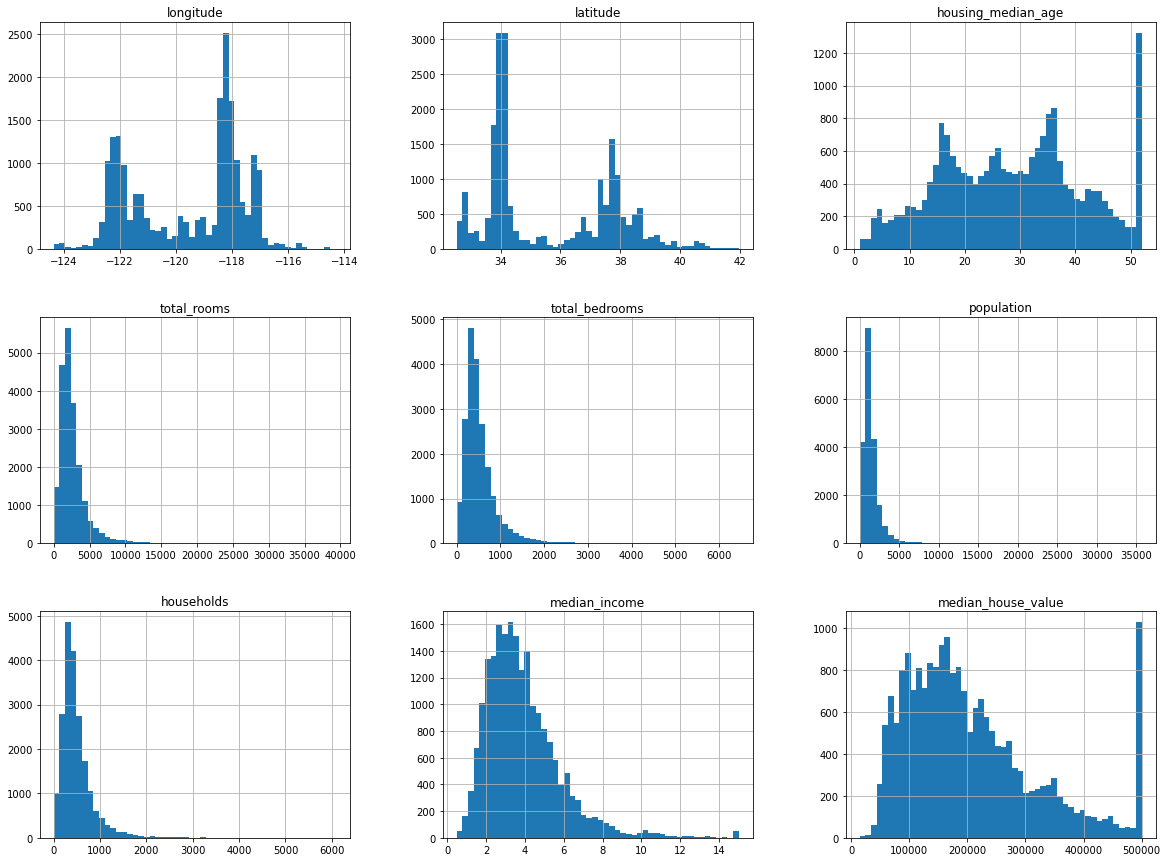

In [62]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Splitting Data

In [63]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Data Manipulation

### Add attribute: Income Category

Adding Income Category attribute (*income_cat*) to capture various categories of income. </br>
This will influence the house prices.

<AxesSubplot:>

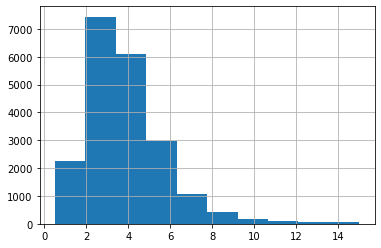

In [64]:
housing.median_income.hist()

In [65]:
import numpy as np

# limit the number of income categories by dividing by 1.5 (no science behind selecting 1.5, just select what feels right)
# round up using ceil, to have discrete categories
housing["income_cat"] = np.ceil(housing.median_income / 1.5)
# merge all categories greater than 5 to 5 itself (categories of 6 and above also exist if we see the histogram of median income)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [66]:
housing.income_cat.value_counts() 

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

<AxesSubplot:>

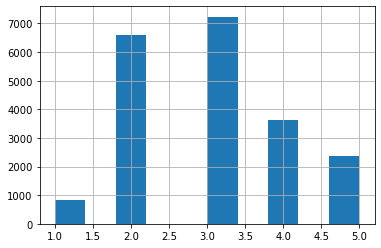

In [67]:
housing.income_cat.hist()

### Stratified Sampling

capturing samples that represent the data and avoiding skewness

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [69]:
strat_test_set["income_cat"].value_counts()

3.0    1447
2.0    1316
4.0     728
5.0     472
1.0     165
Name: income_cat, dtype: int64

<AxesSubplot:>

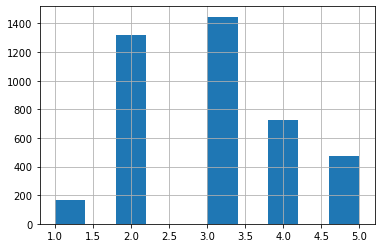

In [70]:
strat_test_set["income_cat"].hist()

Remove income_cat attribute so the data is back to its original state

In [71]:
for set in (strat_train_set, strat_test_set):
  set.drop(["income_cat"], axis=1, inplace=True)

# Discover & Visualize

In [72]:
# copying training set so that we don't hamper with original data
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

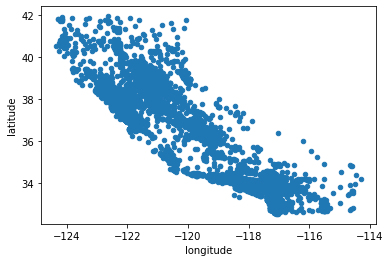

In [75]:
# since our data has latitude and longitude, let's check how it is spread geographically
housing.plot(kind="scatter", x="longitude", y="latitude")

let's set alpha to 0.1 to better understand the density

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

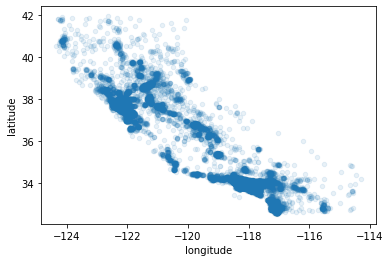

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Visualizing housing prices

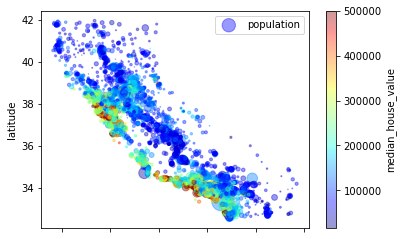

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

We can see,
- prices are high near the beaches/ocean's proximity
- prices are high are dense areas